# Homework  1
## Yangyin Wang

Question 1(a)

$$n=\sum\limits_{i=1}^T k*(k-1)^{i - 1}$$
$$k\sum\limits_{i=1}^T (k-1)^{i - 1}$$
$$k*\frac{1-(k-1)^{T}}{1-(k-1)}\\n = k\frac{1-(k-1)^{T}}{2-k}$$

Question 1(b)

$$N = k\frac{1-(k-1)^{T_{max}}}{2-k}$$
$$\frac{N-1}{k}(2-k)=1-(k-1)^{T_{max}}$$
$$\frac{2N-Nk-2+k}{k}-1=-(k-1)^{T_{max}}$$
$$\frac{2+Nk-2N}{k}=(k-1)^{T_{max}}$$
$$\ln(\frac{2+Nk-2N}{k})=T_{max}*\ln(k-1)$$
$$T_{max}=\frac{\ln(\frac{2+Nk-2N}{k})}{\ln(k-1)}\\d_{max}=2*T_{max}$$
$$d_{max}=2*\frac{\ln(\frac{2+Nk-2N}{k})}{\ln(k-1)}$$

Question 1(c)

from 1(b) we get:$$\frac{2+Nk-2N}{k}=(k-1)^{T_{max}}$$
then: $$N(k-2)=(k-1)^{T}*k-2$$
$$N=\frac{(k-1)^{T}*k-2}{k-2}$$
$$N = (k-1)^{T}$$
N exponentially increase with k, which means k<<N. So this network display the small-world property.

Question 2

We have:
$$P(k_i=k)={N-1\choose k}p^k(1-p)^{N-1-k}$$
We assume N>>k, therefore:
$${N-1\choose k}=\frac{(N-1)(N-1-1)(N-1-2)...(N-1-k+1)}{k!}\approx \frac{(N-1)^k}{k!}$$
Then:
$$\ln[(1-p)^{(N-1)-k}] = (N-1-k)\ln(1-\frac{<k>}{N-1})$$
Using Taylor Series Expansion:
$$\ln[(1-p)^{N-1-k}]\approx (N-1-k)\frac{<k>}{N-1}=<k>(1-\frac{k}{N-1})\approx -<k>$$
$$ (1-p)^{N-1-k}=e^{-<k>}$$
Back to the original function:
$$P(k_i=k)={N-1\choose k}p^k(1-p)^{N-1-k}=\frac{(N-1)^k}{N-1}p^ke^{-<k>}$$
$$p_k=e^{-<k>}\frac{<k>^k}{k!}$$


Question 4

In [6]:
import networkx
G = networkx.random_tree(100)

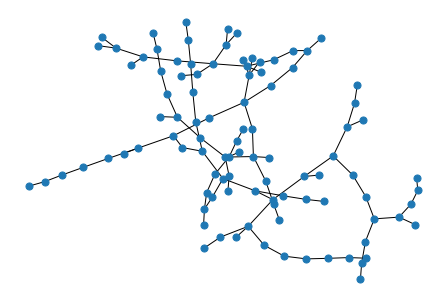

In [12]:
networkx.draw(G, node_size=50)

Question 4(a)

In [24]:
def max_degree(G):
    l = []
    for i in G.nodes():
        l.append(G.degree(i))
    return max(l)

max_degree(G)

4

Question 4(b)

In [37]:
def find_common_neighbor(G,node1, node2):
    neighbor1_list = []
    neighbor2_list = []
    common_list = []
    for neighbor in G.neighbors(node1):
        neighbor1_list.append(neighbor)
    for neighbor in G.neighbors(node2):
        neighbor2_list.append(neighbor)
        
    for i in neighbor1_list:
        if i in neighbor2_list:
            common_list.append(i)
    return common_list


find_common_neighbor(G,13,19)

[]

Question 4(c)

In [81]:
G = networkx.generators.random_graphs.watts_strogatz_graph(n= 1000, k =10, p = 0)
l0 = networkx.average_shortest_path_length(G)
c0 = networkx.average_clustering(G)

In [83]:
p = (0.0001, 0.0003, 0.0006, 0.0009, 0.002,0.005,0.009, 0.02, 0.05, 0.09, 0.2, 0.5, 0.9, 1)
list_yl = []
list_yc = []
for prob in p:
    G = networkx.generators.random_graphs.watts_strogatz_graph(n= 1000, k =10, p = prob)
    list_yl.append(networkx.average_shortest_path_length(G)/l0)
    list_yc.append(networkx.average_clustering(G)/c0)
    

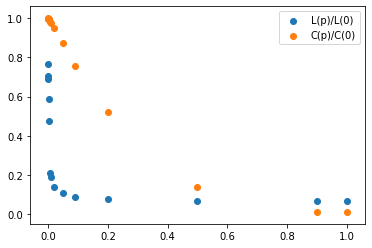

In [106]:
import matplotlib.pyplot as plt


plt.scatter(p, list_yl)
plt.scatter(p, list_yc)
plt.legend(['L(p)/L(0)', 'C(p)/C(0)'])
